In [1]:
import plotly.figure_factory as ff
import plotly.express as px
import pandas as pd 
import numpy as np

dataset = pd.read_csv(r'export/dataset.csv', delimiter=',', on_bad_lines='skip')

In [2]:


corr_matrix = round(dataset.corr(), 4)

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.values.tolist(),
                                  y = corr_matrix.index.values.tolist(),
                                  )

fig.show()

In [3]:
###################
###### TEST OUTLIER 
print(len(dataset))

dfnumVotes = dataset.sort_values(by=['numVotes'])
#dfnumVotes = dfnumVotes[dfnumVotes['numVotes'] < 1670000] # 1670000 -> 0.2172
#dfnumVotes = dfnumVotes[dfnumVotes['numVotes'] > 170000] #  30_000 -> 0.3598, 50_000 -> 0.3972, 80_000 -> 0.436, 100_000 -> 0.4547, 160_000 -> 0.5077

dfnumVotes = dfnumVotes[dfnumVotes['numVotes'] < 20000]
dfnumVotes = dfnumVotes[dfnumVotes['numVotes'] > 200]

print(len(dfnumVotes))

px.histogram(dfnumVotes["numVotes"])

88648
47417


In [4]:
corr_matrix = round(dfnumVotes.corr(), 4)

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.values.tolist(),
                                  y = corr_matrix.index.values.tolist(),
                                  )

fig.show()

In [5]:
dfduree = dfnumVotes.sort_values(by=['duree'])
dfduree = dfduree[dfduree['duree'] < 150]
dfduree = dfduree[dfduree['duree'] > 40]

print(len(dfduree))

px.histogram(dfduree["duree"])

45780


In [6]:
corr_matrix = round(dfduree.corr(), 4)

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.values.tolist(),
                                  y = corr_matrix.index.values.tolist(),
                                  )


fig.show()

In [7]:
dfyear = dfduree.sort_values(by=['year'])
dfyear = dfyear[dfyear['year'] < 2017]
dfyear = dfyear[dfyear['year'] > 1930]

print(len(dfyear))

px.histogram(dfyear["year"])

38592


In [8]:
corr_matrix = round(dfyear.corr(), 4)

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.values.tolist(),
                                  y = corr_matrix.index.values.tolist(),
                                  )


fig.show()

37759


<AxesSubplot:>

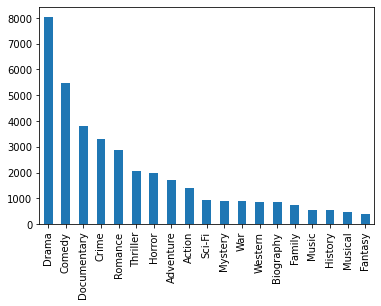

In [9]:
dfgenre = dfyear
countGenre = dfgenre['genre'].value_counts()
countGenre = countGenre[countGenre[:] > 400 ] # Drop Less than 5% of biggest genre.
listGenre = countGenre.keys().tolist()

dfgenre = dfgenre[dfgenre['genre'].isin(listGenre)]

print(len(dfgenre))

countGenre.plot(kind='bar')

Not Rated       10391
R                9804
Approved         3294
PG               2806
PG-13            2401
Passed           2099
Tous publics     1782
Unrated          1607
Name: parentalAdvisor, dtype: int64
34184


<AxesSubplot:>

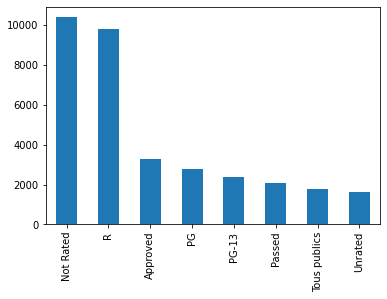

In [10]:
dfparentalAdvisor = dfgenre
countAdvisor = dfparentalAdvisor['parentalAdvisor'].value_counts()

countAdvisor = countAdvisor[countAdvisor[:] > 1000 ] # Drop Less than 5% of biggest genre.
print(countAdvisor)
listGenre = countAdvisor.keys().tolist()

dfparentalAdvisor = dfparentalAdvisor[dfparentalAdvisor['parentalAdvisor'].isin(listGenre)]

print(len(dfparentalAdvisor))

countAdvisor.plot(kind='bar')

In [11]:
dfimdbRating = dfparentalAdvisor.sort_values(by=['imdbRating'])

print(len(dfimdbRating))

px.histogram(dfimdbRating["imdbRating"])

34184


In [12]:
corr_matrix = round(dfimdbRating.corr(), 4)

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.values.tolist(),
                                  y = corr_matrix.index.values.tolist(),
                                  )

fig.show()

In [13]:
dfimdbRating.to_csv(r'export/datasetWithoutOutlier.csv', index = False, header=True)